In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

sns.set(color_codes=True)

### Generación de datos
Se genera un conjunto de datos en 2 dimensiones

In [2]:
np.random.seed(123)
x = np.random.normal(loc=1, scale=2, size=(2, 1000))
data = np.transpose(x)
df = pd.DataFrame(data, columns=["x", "y"])

### Área cubierta de los datos
El "área" cubierta por los datos es la siguiente

In [3]:
area = (df.x.max()-df.x.min())*(df.y.max()-df.y.min())
print('Área = {:.2f}'.format(area))

Área = 181.01


### Representación gráfica
Representación gráfica de los datos

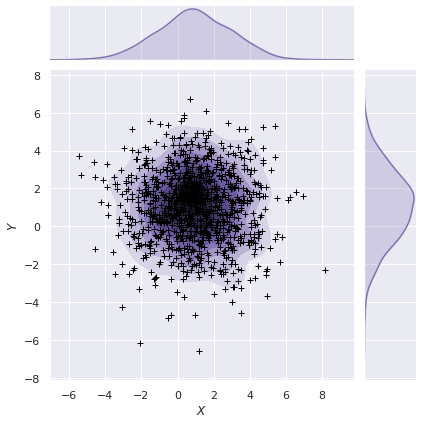

In [4]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

### Normalización de los datos

Normalizar datos consiste en cambiar la distribución de los mismos para que se encuentren restringidos en el intervalo de $-1$ a $1$. La normalización de los datos se realizará con una matriz de la forma $$M = \left[\begin{array}{cc} \frac{1}{x_{max}-x_{min}} & 0\\ 0 & \frac{1}{y_{max}-y_{min}} \end{array}\right]$$ 

In [5]:
M = np.array([[1/(df.x.max()-df.x.min()), 0],[0, 1/(df.y.max()-df.y.min())]])

### Reducción del área de los datos
Los datos expanden el área en el espacio de $\mathbb{R}^2$ un factor de $\vert M \vert$. En este caso el factor de expansión del espacio es

In [6]:
expansion_factor = np.linalg.det(M)
print('Factor de expansión = {:.2f}'.format(expansion_factor))
print('Área estimada luego de la transformación = {:.2f}'.format(expansion_factor*area))

Factor de expansión = 0.01
Área estimada luego de la transformación = 1.00


### Transformación de los datos
La aplicación de la matriz $M$ a los datos se puede obtener como

In [7]:
data_transformed = np.transpose(M@x)
df_transformed = pd.DataFrame(data_transformed, columns=["x", "y"])

### Representación gráfica
Representación gráfica de los datos transformados

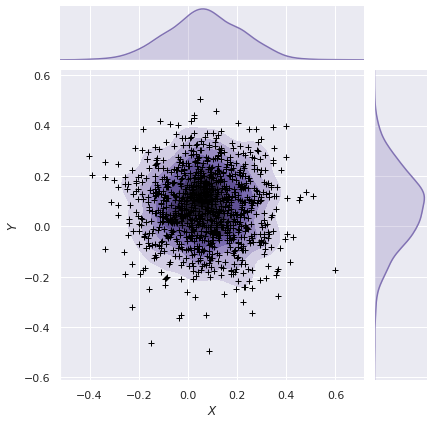

In [8]:
f = sns.jointplot(x="x", y="y", data=df_transformed, kind="kde", color="m")
f.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")
f.ax_joint.collections[0].set_alpha(0)
f.set_axis_labels("$X$", "$Y$");

### Área cubierta de los datos transformados
El "área" cubierta por los datos transformados es la siguiente

In [9]:
area_transformed = (df_transformed.x.max()-df_transformed.x.min())*(df_transformed.y.max()-df_transformed.y.min())
print('Área transformada = {:.2f}'.format(area_transformed))

Área transformada = 1.00


# K-Means
K-medias es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de $n$ observaciones en $k$ grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. Es un método utilizado en minería de datos. [Wikipedia](https://es.wikipedia.org/wiki/K-medias)

### Método del codo
El método del codo consiste en observar la gráfica de WCSS contra el número de grupos $k$ y seleccionar el punto donde se da el quiebre de la gŕafica. WCSS es la suma de los cuadrados de las distancias de cada punto en los grupos respecto a su centriode específico.

In [10]:
transformed = False

if transformed == True:
    data = df_transformed
else:
    data = df

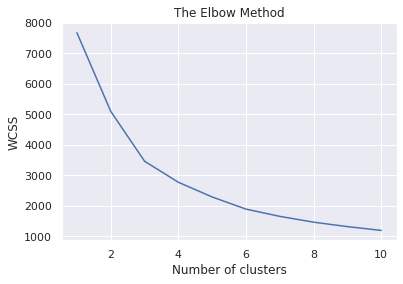

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Fitting K-Means to the dataset
clusters = 10
kmeans = KMeans(n_clusters = clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

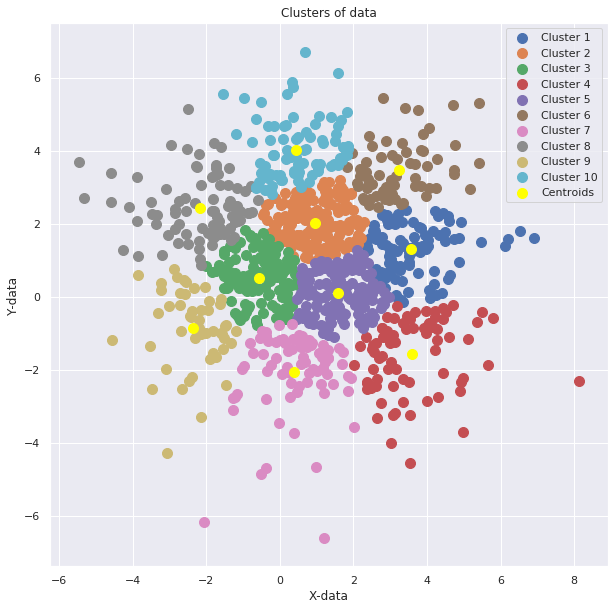

In [13]:
plt.rcParams["figure.figsize"] = (10,10)
# Visualising the clusters
for cluster in range(clusters):
    plt.scatter(data.x[y_kmeans == cluster], data.y[y_kmeans == cluster], s = 100, 
                label = 'Cluster {}'.format(cluster+1))
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, 
            c = 'yellow', label = 'Centroids')
    

plt.title('Clusters of data')
plt.xlabel('X-data')
plt.ylabel('Y-data')
plt.legend()
plt.show()